In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### load and preprocess data

In [2]:
Train_data = pd.read_csv('linear_data_train.csv')
Test_data = pd.read_csv('linear_data_test.csv')
print(Train_data.head(2), Train_data.shape)
print(Test_data.head(2), Test_data.shape)

         X1        X2   Y
0  0.272702  0.020194  -1
1  0.867855  0.597830   1 (1000, 3)
         X1        X2   Y
0  0.147562  0.243518  -1
1  0.179869  0.092254  -1 (200, 3)


In [3]:
Train_data = Train_data.to_numpy()
Test_data = Test_data.to_numpy()

X_train = Train_data[:, [0,1]]
Y_train = Train_data[:, 2]
X_test = Test_data[:, [0,1]]
Y_test = Test_data[:, 2]

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1000, 2) (1000,) (200, 2) (200,)


In [4]:
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1000, 2) (1000, 1) (200, 2) (200, 1)


### Perceptron class, predict and evaluate

In [5]:
class Perceptron:
    def __init__(self):
        pass
    
    def fit(self, itr, X_tarin, Y_tarin):
        self.W = np.random.rand(2)
        lr = 0.0001
        MAE = []
        MSE = []

        for i in range(itr):
            num_false = 0
            mae = []
            mse = []

            for i in range(X_train.shape[0]):
                x_train = X_train[i].reshape(1,-1)
                y_pred = np.matmul(x_train, self.W )

                e = Y_train[i] - y_pred
                self.W = self.W  + e * lr * X_train[i]
          
                mae.append(np.abs(e))
                mse.append(np.square(e))

            MAE.append(np.mean(mae))
            MSE.append(np.mean(mse))

        return MAE, MSE

    def predict(self, X_test):
        Y_pred = np.matmul(X_test, self.W )
        Y_pred[Y_pred > 0] = 1
        Y_pred[Y_pred<0] = -1

        return Y_pred

    def evaluate(self, X_test, Y_test, metric):
        Y_pred = np.matmul(X_test, self.W)
        Y_pred = Y_pred.reshape(-1,1)
#         print(Y_pred)
        
        if metric == 'MAE':
            absolute_error = np.abs(Y_pred - Y_test)
#             print(absolute_error)
#             absolute_error = np.round(absolute_error, 1)
            evaluation = np.mean(absolute_error)
            
        if metric == 'MSE':
            squared_error = (Y_pred - Y_test) ** 2
#             print(squared_error)
#             squared_error = np.round(squared_error, 1)
            evaluation = np.mean(squared_error)
            
        if metric == 'accuracy':
            Y_pred[Y_pred > 0] = 1
            Y_pred[Y_pred<0] = -1
            evaluation = np.count_nonzero(Y_pred == Y_test) / len(Y_test)
                                 
        return evaluation

In [6]:
#train

itration = 1000
model = Perceptron()
MAE, MSE = model.fit(itration, X_train, Y_train)

In [12]:
#predict

Y_pred = model.predict(X_test)
print(Y_pred)
print(Y_test)

[ 1.  1.  1.  1. -1. -1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1. -1.
  1.  1.  1. -1. -1.  1.  1. -1.  1. -1.  1.  1.  1.  1. -1.  1. -1.  1.
  1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.
 -1.  1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1. -1.  1. -1.  1.
 -1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1.  1. -1.
  1. -1. -1. -1. -1.  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.  1.
  1.  1.  1. -1.  1. -1.  1.  1.  1. -1.  1.  1. -1. -1.  1.  1.  1.  1.
  1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.
  1.  1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.
  1.  1.]
[[-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.

In [8]:
#evaluate

accuracy = model.evaluate(X_test, Y_test, 'accuracy')
MSE_test = model.evaluate(X_test, Y_test, 'MSE')
MAE_test = model.evaluate(X_test, Y_test, 'MAE')
print("accuracy_test", accuracy)
print("MSE_test", MSE_test)
print("MAE_test", MAE_test)

[[ 0.53633241]
 [ 0.0553747 ]
 [ 0.63299853]
 [ 0.21709418]
 [-0.37353664]
 [-0.44152356]
 [ 0.08706909]
 [ 0.04626017]
 [ 0.29378557]
 [-0.35829087]
 [ 0.96576023]
 [-0.37687832]
 [-0.0079707 ]
 [ 0.53351666]
 [ 0.73396852]
 [ 0.87561691]
 [-0.1115735 ]
 [-0.29448095]
 [ 0.24581095]
 [ 0.4693963 ]
 [ 0.38435123]
 [-0.38062415]
 [-0.43382436]
 [ 0.04632871]
 [ 0.98032712]
 [-0.17119389]
 [ 1.13055057]
 [-0.33007261]
 [ 0.16787507]
 [ 0.56028306]
 [ 0.89841652]
 [ 0.53119136]
 [-0.0666799 ]
 [ 0.37851747]
 [-0.10429365]
 [ 0.59547402]
 [ 0.57821678]
 [ 0.17809269]
 [ 0.07345085]
 [ 0.56069429]
 [ 0.86368735]
 [ 0.87865561]
 [-0.19342755]
 [-0.1948502 ]
 [ 0.05309813]
 [ 0.06032225]
 [-0.10151806]
 [ 0.22242633]
 [ 0.59312637]
 [ 0.59361225]
 [ 0.43095085]
 [ 0.99358372]
 [-0.27992594]
 [ 0.10286134]
 [-0.90151525]
 [ 0.76659878]
 [ 0.0053593 ]
 [ 0.18247362]
 [ 0.72181008]
 [ 0.07161024]
 [ 0.35404429]
 [-0.07994626]
 [-0.2022877 ]
 [-0.36697882]
 [ 0.22022336]
 [ 0.20730006]
 [ 1.09146

Text(0, 0.5, 'MAE')

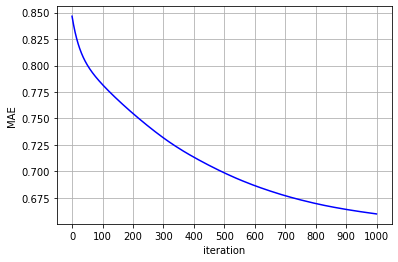

In [9]:
plt.plot((np.arange(len(MAE))), MAE, c='b')
plt.grid(True)
plt.xticks(np.arange(0,len(MAE)+1,100))

plt.xlabel('iteration')
plt.ylabel('MAE')

Text(0, 0.5, 'MSE')

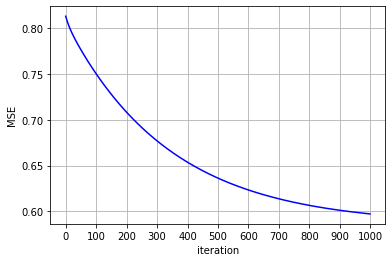

In [10]:
plt.plot((np.arange(len(MSE))), MSE, c='b')
plt.grid(True)
plt.xticks(np.arange(0,len(MSE)+1,100))

plt.xlabel('iteration')
plt.ylabel('MSE')

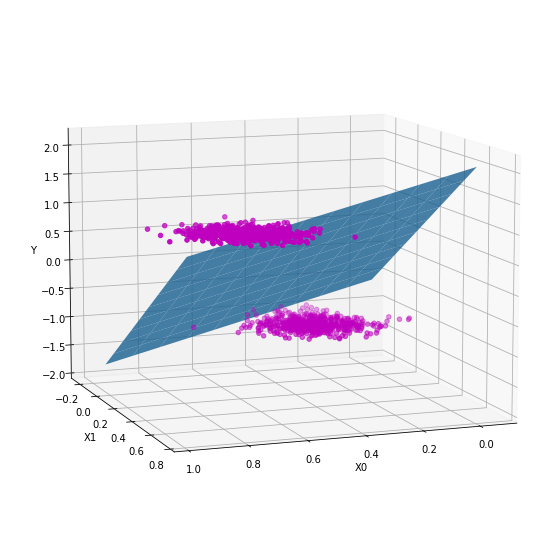

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.view_init(10, 70)

x_range = np.arange(X_train[:,0].min(), X_train[:,0].max(), 0.1)
y_range = np.arange(X_train[:,1].min(), X_train[:,1].max(), 0.1)
x, y = np.meshgrid(x_range, y_range)
z = x * model.W[0] + y * model.W[1]

surf = ax.plot_surface(x, y, z, alpha = 0.8, rstride=1, cstride=1)
ax.scatter(X_train[:,0], X_train[:,1], Y_train, c='m', marker='o')

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')

plt.pause(0.001)